In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [77]:
df = pd.read_csv('stircom.csv')
df.head(5)  

,ID,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,32390233,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,41226029,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,85498057,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,76539627,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,76290986,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


In [78]:
len(df.columns)

20

In [79]:
df.dtypes.index

Index(['ID', 'town', 'country', 'age', 'job', 'married', 'education',
       'arrears', 'current_balance', 'housing', 'has_tv_package',
       'last_contact', 'conn_tr', 'last_contact_this_campaign_day',
       'last_contact_this_campaign_month', 'this_campaign',
       'days_since_last_contact_previous_campaign',
       'contacted_during_previous_campaign', 'outcome_previous_campaign',
       'new_contract_this_campaign'],
      dtype='object')

In [80]:
df.info()  # checking the various columns and their respective datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         50662 non-null  int64  
 1   town                                       50662 non-null  object 
 2   country                                    50662 non-null  object 
 3   age                                        50662 non-null  int64  
 4   job                                        50662 non-null  object 
 5   married                                    50662 non-null  object 
 6   education                                  50662 non-null  object 
 7   arrears                                    50662 non-null  object 
 8   current_balance                            50662 non-null  float64
 9   housing                                    50662 non-null  object 
 10  has_tv_package        

In [81]:
df.shape # checking the number of training examples and features (training instances, features)

(50662, 20)

## Goal : explore numerical values 

In [82]:
df.describe()

,ID,age,current_balance,conn_tr,last_contact_this_campaign_day,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign
count,5.066200e+04,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000,50662.000000
mean,5.502871e+07,40.979373,13.991210,3.005093,15.768525,2.713217,42.644408,0.640283
std,2.598596e+07,10.919324,30.899163,1.409003,8.347083,3.052227,102.238078,2.358029
min,1.000073e+07,18.000000,-80.190000,1.000000,1.000000,1.000000,-1.000000,0.000000
25%,3.249964e+07,32.000000,0.820000,2.000000,8.000000,1.000000,-1.000000,0.000000
50%,5.501127e+07,39.000000,4.720000,3.000000,16.000000,2.000000,-1.000000,0.000000
75%,7.748809e+07,48.000000,14.950000,4.000000,21.000000,3.000000,-1.000000,0.000000
max,9.999952e+07,95.000000,984.170000,5.000000,31.000000,63.000000,871.000000,275.000000


In [83]:
df.isnull().sum()  # checking the number of missing values with respect to each feature

ID                                           0
town                                         0
country                                      0
age                                          0
job                                          0
married                                      0
education                                    0
arrears                                      0
current_balance                              0
housing                                      0
has_tv_package                               0
last_contact                                 0
conn_tr                                      0
last_contact_this_campaign_day               0
last_contact_this_campaign_month             0
this_campaign                                0
days_since_last_contact_previous_campaign    0
contacted_during_previous_campaign           0
outcome_previous_campaign                    0
new_contract_this_campaign                   0
dtype: int64

In [84]:
[features for features in df.columns if df[features].isnull().sum() > 0]

[]

## This verifies that there are no missing values in any of the features

In [85]:
# cheching if there are any duplicates
df.duplicated().sum()

0

In [86]:
# checking the number of towns there are and how they are being represented
df.town.value_counts()

London             3241
Birmingham         2383
Glasgow            1991
Bristol            1693
Liverpool          1591
                   ... 
Southend-on-Sea     375
Blackburn           373
Southport           372
Bedford             367
Stevenage           360
Name: town, Length: 101, dtype: int64

In [87]:
# we can store the town names of townns and the number of customers in there in variables 
town_names = df.town.value_counts().index
town_values = df.town.value_counts().values

([<matplotlib.patches.Wedge at 0x25c38dc4e50>,
 [Text(0.7354371867355677, 0.8180049782039678, 'London'),
  Text(-0.7275732644087305, 0.8250073605233008, 'Birmingham'),
  Text(-1.0560741915863237, -0.30774551477689027, 'Glasgow'),
  Text(-0.3607443605515457, -1.0391648119188104, 'Bristol'),
  Text(0.5422596529413632, -0.9570551022756801, 'Liverpool'),
  Text(1.0435194473030174, -0.3479470693947653, 'Manchester')],
 [Text(0.40114755640121874, 0.44618453356580057, '26.69%'),
  Text(-0.3968581442229439, 0.4500040148308913, '19.62%'),
  Text(-0.5760404681379947, -0.16786118987830378, '16.40%'),
  Text(-0.19676965120993398, -0.5668171701375329, '13.94%'),
  Text(0.29577799251347087, -0.5220300557867346, '13.10%'),
  Text(0.5691924258016458, -0.18978931057896284, '10.24%')])

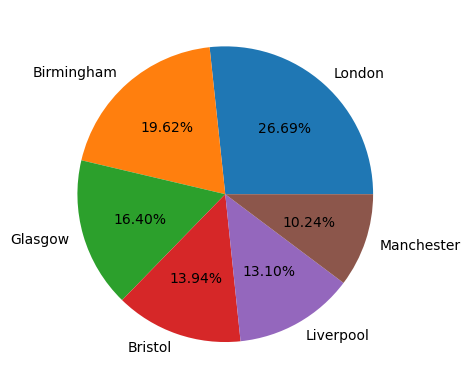

In [88]:
# we can use a piechart to visualize the top 6 towns with many customers
plt.pie(town_values[:6], labels=town_names[:6], autopct='%1.2f%%')

## It can be observed that among the top six towns with many customers London has the large number of customers.

# Pandas profiling

In [89]:
from ydata_profiling import ProfileReport

In [90]:
p_report = ProfileReport(df, title='Profile Report')
p_report.to_file('report.html')  

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

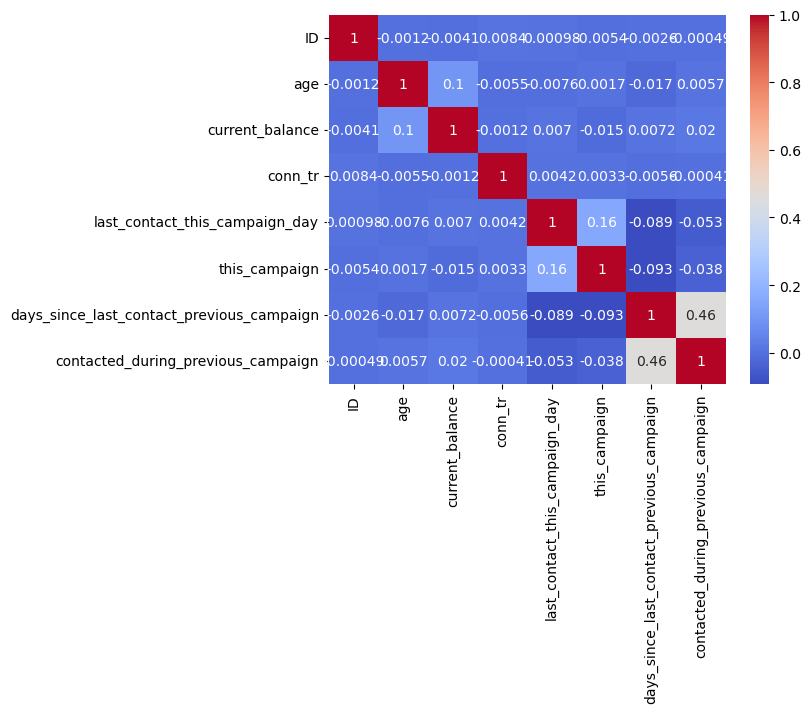

In [91]:
## checking correlation between varialbles and visualing it 
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()    ## why didn't it show negative correlation coefficient

In [92]:
# we can drop the Id column since it has no effect on the value we want to predict
df.drop(['ID'], axis=1, inplace=True)
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,yes
1,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,yes
2,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,yes
3,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,no
4,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,yes


In [93]:
df.info() # checking the datatypes of the various culumns to see which categorical  features we have to change to numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   town                                       50662 non-null  object 
 1   country                                    50662 non-null  object 
 2   age                                        50662 non-null  int64  
 3   job                                        50662 non-null  object 
 4   married                                    50662 non-null  object 
 5   education                                  50662 non-null  object 
 6   arrears                                    50662 non-null  object 
 7   current_balance                            50662 non-null  float64
 8   housing                                    50662 non-null  object 
 9   has_tv_package                             50662 non-null  object 
 10  last_contact          

In [94]:
# checking the distict categories for the new_contract_this_campaign feature
df['new_contract_this_campaign'].unique()

array(['yes', 'no'], dtype=object)

In [95]:
# now we can map yes to 1 and no to 0
df['new_contract_this_campaign'] = df['new_contract_this_campaign'].map({'yes':1, 'no':0})
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,UK,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,1
1,Basildon,UK,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,1
2,Blackburn,UK,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,1
3,Oldham,UK,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,0
4,Middlesbrough,UK,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,1


In [96]:
df['country'].unique()

array(['UK', 'France', 'Germany', 'USA', 'Portugal'], dtype=object)

In [97]:
label_encoder = LabelEncoder()
df['country'] = label_encoder.fit_transform(df['country'])
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,management,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,1
1,Basildon,3,53,housemaid,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,1
2,Blackburn,3,79,retired,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,1
3,Oldham,3,43,services,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,0
4,Middlesbrough,3,35,technician,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,1


In [98]:
df['country'].unique()

array([3, 0, 1, 4, 2])

In [99]:
df['job'].unique()

array(['management', 'housemaid', 'retired', 'services', 'technician',
       'student', 'blue-collar', 'self-employed', 'admin.', 'unemployed',
       'entrepreneur', 'unknown'], dtype=object)

In [100]:
df['job'] = label_encoder.fit_transform(df['job'])
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,4,married,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,1
1,Basildon,3,53,3,married,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,1
2,Blackburn,3,79,5,divorced,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,1
3,Oldham,3,43,7,single,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,0
4,Middlesbrough,3,35,9,single,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,1


In [101]:
df['job'].unique()

array([ 4,  3,  5,  7,  9,  8,  1,  6,  0, 10,  2, 11])

In [102]:
df['married'].unique()

array(['married', 'divorced', 'single'], dtype=object)

In [103]:
df['married'] = df['married'].map({'married':1, 'divorced':2, 'single':3})
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,4,1,tertiary,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,1
1,Basildon,3,53,3,1,primary,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,1
2,Blackburn,3,79,5,2,primary,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,1
3,Oldham,3,43,7,3,secondary,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,0
4,Middlesbrough,3,35,9,3,secondary,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,1


In [104]:
df['married'].unique()

array([1, 2, 3], dtype=int64)

In [105]:
df['education'].unique()

array(['tertiary', 'primary', 'secondary', 'unknown'], dtype=object)

In [106]:
df['education'] = label_encoder.fit_transform(df['education'])
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,4,1,2,no,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,1
1,Basildon,3,53,3,1,0,no,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,1
2,Blackburn,3,79,5,2,0,no,27.87,no,no,telephone,3,13,jul,1,377,1,success,1
3,Oldham,3,43,7,3,1,no,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,0
4,Middlesbrough,3,35,9,3,1,no,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,1


In [107]:
df['education'].unique()

array([2, 0, 1, 3])

In [108]:
df['arrears'].unique()

array(['no', 'yes'], dtype=object)

In [109]:
df['arrears'] = df['arrears'].map({'yes':1, 'no':0})
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,4,1,2,0,-1.90,no,yes,unknown,4,11,jun,8,-1,0,unknown,1
1,Basildon,3,53,3,1,0,0,3.62,no,no,cellular,1,28,jul,2,-1,0,unknown,1
2,Blackburn,3,79,5,2,0,0,27.87,no,no,telephone,3,13,jul,1,377,1,success,1
3,Oldham,3,43,7,3,1,0,5.50,yes,no,cellular,3,13,may,2,-1,0,unknown,0
4,Middlesbrough,3,35,9,3,1,0,3.44,no,no,cellular,2,27,aug,16,-1,0,unknown,1


In [110]:
df['arrears'].unique()

array([0, 1], dtype=int64)

In [111]:
df['housing'].unique()

array(['no', 'yes'], dtype=object)

In [112]:
df['housing'] = df['housing'].map({'yes':1, 'no':0})
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,4,1,2,0,-1.90,0,yes,unknown,4,11,jun,8,-1,0,unknown,1
1,Basildon,3,53,3,1,0,0,3.62,0,no,cellular,1,28,jul,2,-1,0,unknown,1
2,Blackburn,3,79,5,2,0,0,27.87,0,no,telephone,3,13,jul,1,377,1,success,1
3,Oldham,3,43,7,3,1,0,5.50,1,no,cellular,3,13,may,2,-1,0,unknown,0
4,Middlesbrough,3,35,9,3,1,0,3.44,0,no,cellular,2,27,aug,16,-1,0,unknown,1


In [113]:
df['housing'].unique()

array([0, 1], dtype=int64)

In [114]:
df['last_contact'].unique()

array(['unknown', 'cellular', 'telephone', 'cell'], dtype=object)

In [119]:
df['last_contact'] = label_encoder.fit_transform(df['last_contact'])
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,4,1,2,0,-1.90,0,yes,3,4,11,jun,8,-1,0,unknown,1
1,Basildon,3,53,3,1,0,0,3.62,0,no,1,1,28,jul,2,-1,0,unknown,1
2,Blackburn,3,79,5,2,0,0,27.87,0,no,2,3,13,jul,1,377,1,success,1
3,Oldham,3,43,7,3,1,0,5.50,1,no,1,3,13,may,2,-1,0,unknown,0
4,Middlesbrough,3,35,9,3,1,0,3.44,0,no,1,2,27,aug,16,-1,0,unknown,1


In [120]:
df['last_contact'].unique()

array([3, 1, 2, 0])

In [115]:
df['has_tv_package'].unique()

array(['yes', 'no', 'n'], dtype=object)

In [123]:
### not sure what the 'n' stands for so I want to check how many times there occur
category_counts = df['has_tv_package'].value_counts()
print(category_counts)

no     42886
yes     7771
n          5
Name: has_tv_package, dtype: int64


In [134]:
### still not sure what it means but will encode anyway
df['has_tv_package'] = label_encoder.fit_transform(df['has_tv_package'])
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,15,3,39,4,1,2,0,-1.90,0,2,3,4,11,7,8,-1,0,3,1
1,2,3,53,3,1,0,0,3.62,0,1,1,1,28,6,2,-1,0,3,1
2,9,3,79,5,2,0,0,27.87,0,1,2,3,13,6,1,377,1,2,1
3,62,3,43,7,3,1,0,5.50,1,1,1,3,13,9,2,-1,0,3,0
4,54,3,35,9,3,1,0,3.44,0,1,1,2,27,1,16,-1,0,3,1


In [116]:
df['last_contact_this_campaign_month'].unique()

array(['jun', 'jul', 'may', 'aug', 'sep', 'feb', 'nov', 'mar', 'jan',
       'apr', 'dec', 'oct', 'j'], dtype=object)

In [125]:
df['last_contact_this_campaign_month'] = label_encoder.fit_transform(df['last_contact_this_campaign_month'])
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,4,1,2,0,-1.90,0,yes,3,4,11,7,8,-1,0,unknown,1
1,Basildon,3,53,3,1,0,0,3.62,0,no,1,1,28,6,2,-1,0,unknown,1
2,Blackburn,3,79,5,2,0,0,27.87,0,no,2,3,13,6,1,377,1,success,1
3,Oldham,3,43,7,3,1,0,5.50,1,no,1,3,13,9,2,-1,0,unknown,0
4,Middlesbrough,3,35,9,3,1,0,3.44,0,no,1,2,27,1,16,-1,0,unknown,1


In [126]:
df['last_contact_this_campaign_month'].unique()

array([ 7,  6,  9,  1, 12,  3, 10,  8,  5,  0,  2, 11,  4])

In [117]:
df['outcome_previous_campaign'].unique()

array(['unknown', 'success', 'other', 'failure'], dtype=object)

In [128]:
df['outcome_previous_campaign'] = label_encoder.fit_transform(df['outcome_previous_campaign'])
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,Bristol,3,39,4,1,2,0,-1.90,0,yes,3,4,11,7,8,-1,0,3,1
1,Basildon,3,53,3,1,0,0,3.62,0,no,1,1,28,6,2,-1,0,3,1
2,Blackburn,3,79,5,2,0,0,27.87,0,no,2,3,13,6,1,377,1,2,1
3,Oldham,3,43,7,3,1,0,5.50,1,no,1,3,13,9,2,-1,0,3,0
4,Middlesbrough,3,35,9,3,1,0,3.44,0,no,1,2,27,1,16,-1,0,3,1


In [129]:
df['outcome_previous_campaign'].unique()

array([3, 2, 1, 0])

In [130]:
### feature scaling with standard scaler
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)  

ValueError: could not convert string to float: 'Bristol'

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50662 entries, 0 to 50661
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   town                                       50662 non-null  object 
 1   country                                    50662 non-null  int32  
 2   age                                        50662 non-null  int64  
 3   job                                        50662 non-null  int32  
 4   married                                    50662 non-null  int64  
 5   education                                  50662 non-null  int32  
 6   arrears                                    50662 non-null  int64  
 7   current_balance                            50662 non-null  float64
 8   housing                                    50662 non-null  int64  
 9   has_tv_package                             50662 non-null  object 
 10  last_contact          

In [132]:
df['town'].unique()

array(['Bristol', 'Basildon', 'Blackburn', 'Oldham', 'Middlesbrough',
       'Poole', 'Stockport', 'Wolverhampton', 'Eastbourne',
       'Weston-super-Mare', 'London', 'Sheffield', 'Leeds', 'Raleigh',
       'Cambridge', 'Kingston upon Hull', 'Milton Keynes', 'Nottingham',
       'Woking', 'Birmingham', 'Basingstoke', 'Oxford', 'Luton',
       'Manchester', 'Glasgow', 'Worthing', 'Darlington', 'Sunderland',
       'Birkenhead', 'Chelmsford', 'Cardiff', 'Cheltenham', 'Portsmouth',
       'Bath', 'Chester', 'Bradford', 'Coventry', 'Liverpool',
       'Bournemouth', 'Dundee', 'County Down', 'Exeter', 'Derby',
       'Swindon', 'Edinburgh', 'Hartlepool', 'Gateshead', 'Rochdale',
       'Reading', 'Hemel Hempstead', 'Wakefield', 'Belfast', 'Worcester',
       'Newport', 'Warrington', 'Sutton Coldfield', 'Solihull', 'Telford',
       'Northampton', 'Sale', 'Chesterfield', 'Brighton', 'Stevenage',
       'Leicester', 'Huddersfield', 'York', 'Newcastle upon Tyne',
       'Preston', 'Gloucester

In [133]:
df['town'] = label_encoder.fit_transform(df['town'])
df.head()

,town,country,age,job,married,education,arrears,current_balance,housing,has_tv_package,last_contact,conn_tr,last_contact_this_campaign_day,last_contact_this_campaign_month,this_campaign,days_since_last_contact_previous_campaign,contacted_during_previous_campaign,outcome_previous_campaign,new_contract_this_campaign
0,15,3,39,4,1,2,0,-1.90,0,yes,3,4,11,7,8,-1,0,3,1
1,2,3,53,3,1,0,0,3.62,0,no,1,1,28,6,2,-1,0,3,1
2,9,3,79,5,2,0,0,27.87,0,no,2,3,13,6,1,377,1,2,1
3,62,3,43,7,3,1,0,5.50,1,no,1,3,13,9,2,-1,0,3,0
4,54,3,35,9,3,1,0,3.44,0,no,1,2,27,1,16,-1,0,3,1



## Tried to perform feature scaling on the dataframe but it turned into a numpy array so I stoped
### feature scaling with standard scaler
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)  

In [138]:
df_scaled.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'